In [1]:
import numpy as np
import apogee.tools.read as apread
import apogee.spec.plot as splot
Lambda = splot.apStarWavegrid()
from matplotlib import pyplot as plt
import pylab as pl

In [2]:
from apogee.tools import bitmask
from astropy.io import fits

In [3]:
allStar = apread.allStar(rmcommissioning=True,main=False,ak=True, akvers = 'targ', adddist=False)

In [4]:
mdwarf_indx = bitmask.bit_set(19,allStar['APOGEE_TARGET1'])
print(mdwarf_indx)

mdwarf_index = []
for z in range(len(mdwarf_indx)):
    b = mdwarf_indx[z]*1
    mdwarf_index.append(b)
#print(mdwarf_index)
from collections import Counter
Counter(mdwarf_index)
print(len(mdwarf_index))

[False False False ..., False False False]
155632


In [5]:
from collections import Counter
Counter(mdwarf_indx)

Counter({False: 154882, True: 750})

In [6]:
locationIDs = allStar['LOCATION_ID']
apogeeIDs = allStar['APOGEE_ID']
J_filter = allStar['J']
J_filterr = allStar['J_ERR']
H_filter = allStar['H']
H_filterr = allStar['H_ERR']
K_filter = allStar['K']
K_filterr = allStar['K_ERR']
SNRs = allStar['SNR']
WISE_4_5 = allStar['WISE_4_5']

In [7]:
location_IDs = []
apogee_IDs = []
J = []
J_err = []
H = []
H_err = []
K = []
K_err = []
SNR = []
wise = []


for i in range(len(mdwarf_index)):
    if mdwarf_index[i] == 1:
        l = locationIDs[i]
        a = apogeeIDs[i]
        j = J_filter[i]
        h = H_filter[i]
        k = K_filter[i]
        j_err = J_filterr[i]
        h_err = H_filterr[i]
        k_err = K_filterr[i]
        s = SNRs[i]
        w = WISE_4_5[i]
        location_IDs.append(l)
        apogee_IDs.append(a)
        J.append(j)
        H.append(h)
        K.append(k)
        J_err.append(j_err)
        H_err.append(h_err)
        K_err.append(k_err)
        SNR.append(s)
        wise.append(w)

In [8]:
print(location_IDs[34], apogee_IDs[34], wise[34])
print(location_IDs[450], apogee_IDs[450],wise[450])
print(location_IDs[738], apogee_IDs[738], wise[738])


4476 b'2M00444820+1830403' -9999.99
4514 b'2M13085124-0131075' -9999.99
4475 b'2M23200703+1150071' -9999.99


In [9]:
WISE = []
J_new = []
H_new = []
snr = []
for i in range(len(wise)):
    if wise[i] != wise[34]:
        WISE.append(wise[i])
        J_new.append(J[i])
        H_new.append(H[i])
        snr.append(SNR[i])
print(len(WISE))
print(len(J_new))
print(len(H_new))

658
658
658


In [10]:
type(snr)

list

13.998
6.66
15.337
7.406
14.685
7.043


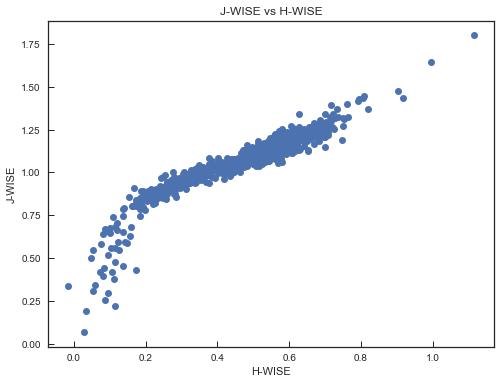

In [11]:
jw = []
hw = []
print(max(WISE))
print(min(WISE))
print(max(J_new))
print(min(J_new))
print(max(H_new))
print(min(H_new))

for r in range(len(J_new)):
    j_w = J_new[r] - WISE[r]
    h_w = H_new[r] - WISE[r]
    jw.append(j_w)
    hw.append(h_w)
plt.figure(figsize=(8,6))
plt.plot(hw,jw,"o")
plt.title('J-WISE vs H-WISE')
plt.xlabel('H-WISE')
plt.ylabel('J-WISE')
plt.savefig('CC_JW_HW',dpi=900)
plt.show()

### Now, let's look at finding the best M-dwarf spectra

Let's begin wiht splitting H-WISE into 10 bins. Then, catagorize the stars into these 10 even incriments. Might be best to make a histogram of this data!

In [12]:
print(max(hw))
print(min(hw))
print(max(jw))
print(min(jw))

1.115
-0.0160003
1.8
0.0679998


In [13]:
ranges,bin_edges = np.histogram(hw, bins = 10, range=None,normed=True,weights=None,density=True)

In [ ]:
print(ranges)

In [ ]:
print(bin_edges)

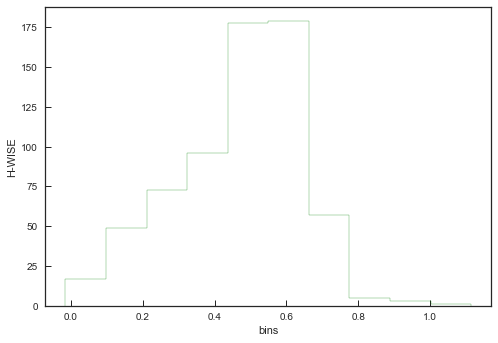

In [14]:
plt.hist(hw,bins=10,color='Green',histtype='step')
plt.xlabel('bins')
plt.ylabel('H-WISE')
plt.savefig('Bins_for_MD.pdf',dpi=500)
plt.show()

In [15]:
best_loc = []
best_apo = []
for i in range(len(hw)):
    if hw[i] >= 0.5:
        if hw[i] < 0.7:
            best_loc.append(location_IDs[i])
            best_apo.append(apogee_IDs[i])
            #print(hw[i])
print(len(best_apo))
bestapo = [s.decode('utf-8') for s in best_apo]
print(bestapo[0])

304
2M00024286+1516102


In [16]:
for k in range(len(best_loc)):
    if best_loc != 1:
        header = apread.apStar(best_loc[k],bestapo[k], ext=0, header=True)
        spectra = apread.apStar(best_loc[k],bestapo[k],ext=1,header=False)[1]
        nvisits = header[1]['NVISITS']
        plt.figure(figsize=(10,10))
        for visit in range(0,nvisits):
            if nvisits != 1:
                plt.title('Spectra for '+str(best_loc[k])+ ' / '+ str(best_apo[k]))
                plt.scatter(Lambda,spectra,s=0.60)
                #pl.legend('upper right')
                plt.savefig('Spectra_for_'+str(best_loc[k])+'_'+str(bestapo[k])+'.pdf',dpi=800)
                plt.close('all')

KeyboardInterrupt: 

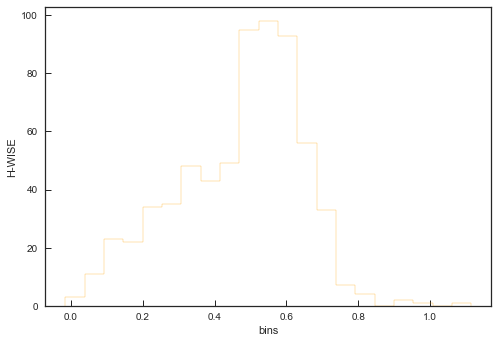

In [18]:
# Auto-generated bins! As you can see, the mean stars lie within the 0.5 - 0.6 range
plt.hist(hw,bins='auto',histtype='step',color='orange')
plt.xlabel('bins')
plt.ylabel('H-WISE')
plt.show()

In [ ]:
#M-dwarfs:
# 4202 2M17204248+4205070
# 4149 2M06115599+3325505
# 4102 2M21442066+4211363
jloc = [4202,4149,4102]
japo = ['2M17204248+4205070','2M06115599+3325505','2M21442066+4211363']

In [ ]:
for x in range(3):
    if jloc != 1:
        Header = apread.apStar(jloc[x],japo[x], ext=0, header=True)
        Spectra = apread.apStar(jloc[x],japo[x],ext=1,header=False)[1]
        Nvisits = Header[1]['NVISITS']
        plt.figure(figsize=(10,10))
        for Visit in range(0,Nvisits):
            if Nvisits != 1:
                plt.title('Spectra for '+str(jloc[x])+ ' / '+ str(japo[x]))
                plt.scatter(Lambda,Spectra+visit,linewidth=1,s=0.50)
                #pl.legend('upper right')
                plt.savefig('Spectra_for_'+str(jloc[x])+'_'+str(japo[x])+'.pdf',dpi=700)
                plt.close('all')

### Redo the above histograms to take into account SNR
    We will need to order these by SNR. The higher the SNR, the better the spectra will be.

In [19]:
new_snr = sorted(snr)
type(new_snr)

list

In [20]:
m_apoID = []
m_locID = []
m_JW = []
m_HW = []

for c in range(len(hw)):
    Name = new_snr[c]
    try:
        match = list(snr).index(Name)
        m_apoID.append(apogee_IDs[match])
        m_locID.append(location_IDs[match])
        m_JW.append(jw[match])
        m_HW.append(hw[match])
    except ValueError:
        pass 

In [21]:
print(max(m_JW))
print(min(m_JW))
print(max(m_HW))
print(min(m_HW))

1.8
0.0679998
1.115
-0.0160003


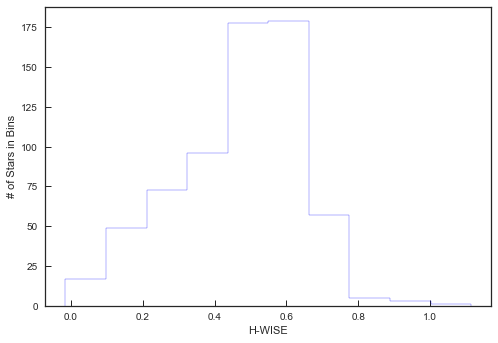

In [22]:
(n,bins,patches) = plt.hist(m_HW,bins=10,color='Blue',histtype='step')
plt.xlabel('H-WISE')
plt.ylabel('# of Stars in Bins')
plt.savefig('Sorted_Bins_for_MD.pdf',dpi=500)
plt.show()

In [ ]:
print(n)

In [ ]:
print(bins)

In [23]:
i = 0

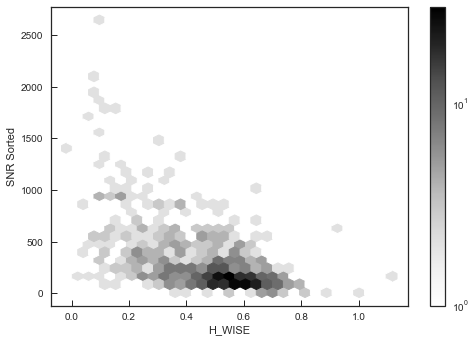

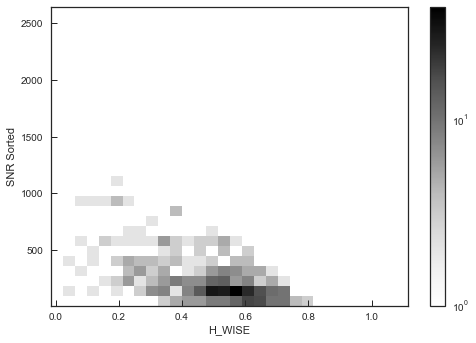

In [24]:
#Let's make a 2D histogram of the H_WISE and the SNR relation!
from matplotlib.colors import LogNorm

# Hexbin histogram
fig, ax = plt.subplots()
im = ax.hexbin(m_HW,new_snr,gridsize=30,norm=LogNorm())
plt.xlabel('H_WISE')
plt.ylabel('SNR Sorted')
fig.colorbar(im,ax=ax)
plt.savefig('Histograms_for_HW_vs_SNR(hex).pdf',depi=1000)

#Normal 2D histogram
fig, ax = plt.subplots()
H = ax.hist2d(m_HW,new_snr,bins=(30,30), norm=LogNorm())
plt.xlabel('H_WISE')
plt.ylabel('SNR Sorted')
fig.colorbar(H[3],ax=ax)
plt.savefig('Histograms_for_HW_vs_SNR.pdf',depi=1000)

plt.show()

In [35]:
high_locID = []
high_apoID = []
high_snr = []
high_HW = []
high_JW = []

for i in range(len(m_HW)):
    if m_HW[i] >= 0.32: #Lower bound of the most populated bin
        if m_HW[i] < 0.593: # Upper bound of the most populated bin
            high_apoID.append(m_apoID[i])
            high_locID.append(m_locID[i])
            high_snr.append(new_snr[i])
            high_JW.append(m_JW[i])
            high_HW.append(m_HW[i])
high_apoID = [s.decode('utf-8') for s in high_apoID]
print(len(high_locID))

356


In [36]:
print(min(high_snr))
print(max(high_snr))

23.6489
1358.4


In [37]:
#Since this is sorted in ascending order, the top two spectra will be the last two elements!
#print(high_snr)
print(high_locID[354], high_apoID[354],high_snr[354])
print(high_locID[355],high_apoID[355],high_snr[355])

4565 2M06125378+2343533 1166.42
4497 2M14583396+4216146 1358.4


### Find the spectra with the highest SNR and save it
    We want to have two spectra that best represent M-dwarfs!

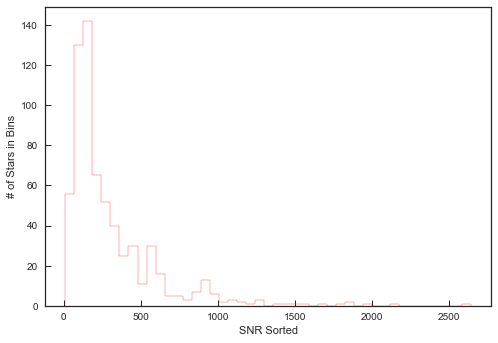

In [38]:
(n1,bins1,patches1) = plt.hist(new_snr,bins='auto',color='red',histtype='step')
plt.xlabel('SNR Sorted')
plt.ylabel('# of Stars in Bins')
plt.show()

In [ ]:
# The number of stars per bin range. The bin edges, which can tell us the bin ranges are given
# in the cell
print(n1)

In [ ]:
# Notice that the overall spred of the SNR tends to favor under 500.
# Let's look at our bins and adjust which stars we look at to be representatives!
print(bins1)

In [39]:
j = 0
rep_locID = []
rep_apoID = []
rep_snr = []

for j in range(len(high_apoID)):
    if high_HW[j] >= 0.32: #Lower bound of most populated bin
        if high_HW[j] < 0.43: #Upper bound of most populated bin
            if high_snr[j] > 70 and high_snr[j] < 125:
                rep_snr.append(high_snr[j])
                rep_locID.append(high_locID[j])
                rep_apoID.append(high_apoID[j])
print(min(rep_snr))          

77.5915


In [40]:
print(type(rep_apoID))

<class 'list'>


In [41]:
rep_apoID = [s.strip('b') for s in rep_apoID]
print(rep_apoID[0])

2M16374278+3538094


In [ ]:
i = 0
for i in range(len(rep_snr)):
    if rep_locID != 1:
        locationID = rep_locID[i]
        apogeeID = rep_apoID[i]
        
        Header = apread.apStar(locationID,apogeeID, ext=0, header=True)
        Spectra = apread.apStar(locationID,apogeeID,ext=1,header=False)[3]
        Nvisits = Header[1]['NVISITS']
        plt.figure(figsize=(10,10))
        for Visit in range(0,Nvisits):
            if Nvisits != 1:
                plt.title('Spectra for '+str(locationID)+ ' / '+ str(apogeeID))
                plt.xlabel('Wavelength'+' '+'('+ r'$\AA$'+')', fontsize=18)
                plt.ylabel('Flux (erg s' + r'$^{-1}$'+' cm'+r'$^{-2}$' + r'$\AA^{-1}$'+')', fontsize=18)
                plt.scatter(Lambda,Spectra+visit,linewidth=1,s=0.50)
                plt.annotate('SNR: '+str(rep_snr[i]),xy=(100,100))
                plt.savefig('Spectra_for_'+str(locationID)+'_'+str(apogeeID)+'.pdf',dpi=800)
                plt.close('all')

### Plot the spectra like Cushing and identify metals
To do this, the apogee tools will need to import more packages!

In [63]:
import apogee.spec.plot as splot
import apogee.tools.read as apread
import matplotlib.pyplot as plt

In [43]:
#data = apread.rcsample()
#indx = data['SNR'] > 200
#data = data[indx]
splot.waveregions(allStar[3512]['LOCATION_ID'], allStar[3512]['APOGEE_ID'],ext=1,
                  apStar=True, labelID=allStar[3512]['APOGEE_ID'],labelTeff=allStar[3512]['TEFF'],
                  labellogg=allStar[3512]['LOGG'],labelmetals=allStar[3512]['METALS'],
                  labelafe=allStar[3512]['ALPHAFE'])

### OLD CODE

In [ ]:
wise = np.array(wise)
print(wise[34])
bad_indx = []
for j in range(len(wise)):
    if wise[j] == wise[34]:
        bad_indx.append(j) 

In [ ]:
print(bad_indx)

In [ ]:
print(len(wise))

In [ ]:
Counter(wise)

In [ ]:
for i in range(len(J)):
    indx = bad_indx[i]
    del J[indx]

In [ ]:
print(len(J))